# `dkmri.py` example

Let's start by importing the packages and modules used in this notebook.

In [1]:
import dkmri
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

Then, let's load a dataset to work on. Replace the code below with code that loads your data.

In [2]:
data = nib.load("dwi.nii.gz").get_fdata()
bvals = np.loadtxt("dwi.bval")
bvecs = np.loadtxt("dwi.bvec").T
mask = nib.load("mask.nii.gz").get_fdata().astype(bool)

The diffusion kurtosis imaging signal model can be fit to data using the function `dkmri.fit`. The docstring contains important information about the function:

In [3]:
dkmri.fit?

Signature: dkmri.fit(data, bvals, bvecs, mask=None, alpha=None, seed=123, quiet=False)
Docstring:
Estimate diffusion and kurtosis tensor elements from data.

This function does the following:

    1. Remove infinities, nans, and negative values in `data`, and scale
       values in `data` and `bvals`.
    2. Estimate model parameters using standard NLLS.
    3. Train a multilayer perceptron to predict kurtosis measures from data
       in voxels where the apparent kurtosis coefficient computed from the
       NLLS fit results is non-negative along all directions.
    4. Estimate model parameters using regularized NLLS where the
       regularization terms increase the objective function value when
       MK, AK, and RK deviate from their predicted values. Axially
       symmetric tensors with plausible magnitudes are used as initial
       positions for the fit.

Parameters
----------
data : numpy.ndarray
    Floating-point array with shape (..., number of acquisitions).
bvals : numpy.

Let's fit the model to data.

In [4]:
fit_result = dkmri.fit(data, bvals, bvecs, mask)

Fitting DKI to data with standard NLLS
Training a neural network to predict kurtosis maps
R^2 = 0.99215 for MK
R^2 = 0.96222 for AK
R^2 = 0.98755 for RK
Calculating initial positions
Fitting DKI to data with regularized NLLS
alpha = 0.14286
100%


`dkmri.fit` returns a `FitResult` object whose attributes contain the results of the fit.

In [5]:
fit_result?

Type:        FitResult
String form: <dkmri.dkmri.FitResult object at 0x7fccc80cd100>
File:        ~/Dropbox/UCL/dki-paper/code/dkmri/dkmri/dkmri.py
Docstring:  
Class for storing the regularized NLLS fit results.

Attributes
----------
params : numpy.ndarray
    Estimated model parameters.
status : numpy.ndarray
    Codes returned by the optimizer in each voxel where it was run. 0 means
    converged succesfully, 1 means maximum BFGS iterations reached, 3 means
    zoom failed, 4 means saddle point reached, 5 means maximum line search
    iterations reached, and -1 means undefined.
mk_pred : numpy.ndarray
    Predicted mean kurtosis map.
ak_pred : numpy.ndarray
    Predicted axial kurtosis map.
rk_pred : numpy.ndarray
    Predicted radial kurtosis map.
mask : numpy.ndarray
    Mask defining voxels in which the fit was run.
params_nlls : numpy.ndarray
    Parameter estimates by the standard NLLS fit.
akc_mask : nump.ndarray
    Mask defining voxels in which AKC computed from the standar

Parameter maps can be computed using the following functions: 

- `dkmri.params_to_ad`
- `dkmri.params_to_ak`
- `dkmri.params_to_fa`
- `dkmri.params_to_md`
- `dkmri.params_to_mk`
- `dkmri.params_to_rd`
- `dkmri.params_to_rk`

In addition, we can use the function `dkmri.signal` to compute the signal from the estimated parameters.

Let's compute and show some parameter maps.

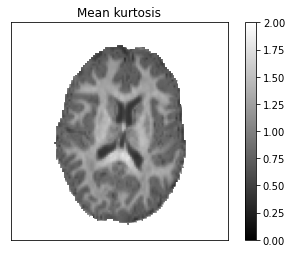

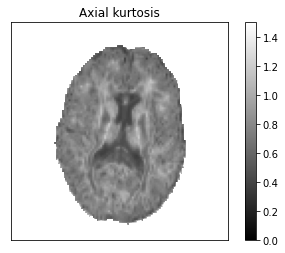

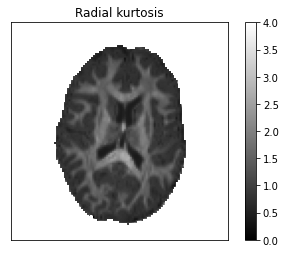

In [6]:
z = 35

mk = dkmri.params_to_mk(fit_result.params, mask)
mk[~mask] = np.nan
plt.imshow(np.rot90(mk[..., z]), vmin=0, vmax=2, cmap="gray")
plt.colorbar()
plt.title("Mean kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

ak = dkmri.params_to_ak(fit_result.params, mask)
ak[~mask] = np.nan
plt.imshow(np.rot90(ak[..., z]), vmin=0, vmax=1.5, cmap="gray")
plt.colorbar()
plt.title("Axial kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

rk = dkmri.params_to_rk(fit_result.params, mask)
rk[~mask] = np.nan
plt.imshow(np.rot90(rk[..., z]), vmin=0, vmax=4, cmap="gray")
plt.colorbar()
plt.title("Radial kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

For comparison, let's also show the maps estimated using standard non-linear least squares.

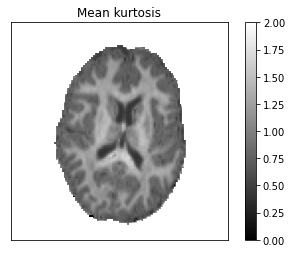

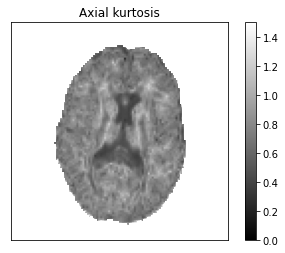

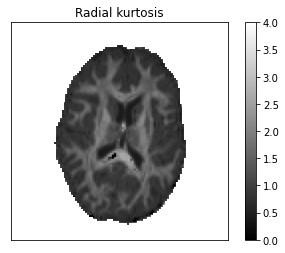

In [7]:
mk = dkmri.params_to_mk(fit_result.params_nlls, mask)
mk[~mask] = np.nan
plt.imshow(np.rot90(mk[..., z]), vmin=0, vmax=2, cmap="gray")
plt.colorbar()
plt.title("Mean kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

ak = dkmri.params_to_ak(fit_result.params_nlls, mask)
ak[~mask] = np.nan
plt.imshow(np.rot90(ak[..., z]), vmin=0, vmax=1.5, cmap="gray")
plt.colorbar()
plt.title("Axial kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

rk = dkmri.params_to_rk(fit_result.params_nlls, mask)
rk[~mask] = np.nan
plt.imshow(np.rot90(rk[..., z]), vmin=0, vmax=4, cmap="gray")
plt.colorbar()
plt.title("Radial kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

Finally, let's also show the predicted maps.

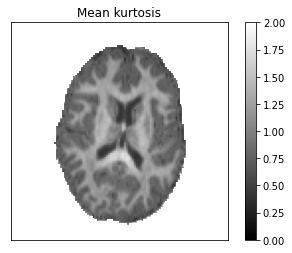

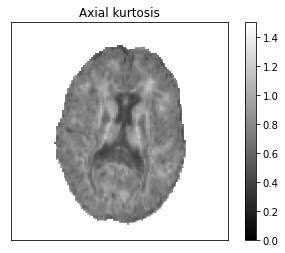

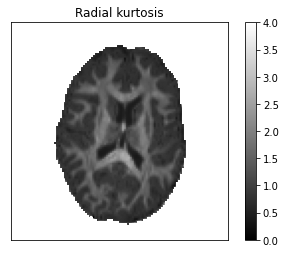

In [8]:
mk = fit_result.mk_pred
mk[~mask] = np.nan
plt.imshow(np.rot90(mk[..., z]), vmin=0, vmax=2, cmap="gray")
plt.colorbar()
plt.title("Mean kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

ak = fit_result.ak_pred
ak[~mask] = np.nan
plt.imshow(np.rot90(ak[..., z]), vmin=0, vmax=1.5, cmap="gray")
plt.colorbar()
plt.title("Axial kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()

rk = fit_result.rk_pred
rk[~mask] = np.nan
plt.imshow(np.rot90(rk[..., z]), vmin=0, vmax=4, cmap="gray")
plt.colorbar()
plt.title("Radial kurtosis")
plt.xticks([])
plt.yticks([])
plt.show()